Data Preprocessing Analysis for Credit Card Approval Project

This Notebook applies 

In [359]:
# let's start by loading the dataset 
import pandas, numpy
import seaborn as sns 

applications = pandas.read_csv("application_record.csv")
credit_records = pandas.read_csv("credit_record.csv")

In [360]:
applications

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [361]:
credit_records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


Renaming fields

In [362]:
# labeling data, presented in the credit records 

# Relabling Credit Records Dataset

CREDIT_MAPPING = {
    "ID": "client_id",
    "STATUS": "due_status",
    "MONTHS_BALANCE": "balance_month"
}
credit_records.rename(columns=CREDIT_MAPPING, inplace=True)

# Relabling Applications Records Dataset
APPLICATION_MAPPING = {
    "ID": "client_id",
    "CODE_GENDER": "gender",
    "FLAG_OWN_CAR": "has_car",
    "FLAG_OWN_REALTY": "has_realty",
    "CNT_CHILDREN": "total_children",
    "AMT_INCOME_TOTAL": "annual_income",
    "NAME_INCOME_TYPE": "income_category",
    "NAME_EDUCATION_TYPE": "education_category",
    "NAME_FAMILY_STATUS": "family_status",
    "NAME_HOUSING_TYPE": "living_place",
    "DAYS_BIRTH": "birthday",
    "FLAG_MOBIL": "has_mobile_phone",
    "FLAG_PHONE": "has_phone_number",
    "FLAG_WORK_PHONE": "has_work_phone",
    "FLAG_EMAIL": "has_email",
    "CNT_FAM_MEMBERS": "family_size",
    "OCCUPATION_TYPE": "job",
    'DAYS_EMPLOYED': 'days_employed',
}

applications.rename(columns=APPLICATION_MAPPING, inplace=True)


Null Values handling (Application Records)

In [363]:
applications.isnull().sum()

client_id                  0
gender                     0
has_car                    0
has_realty                 0
total_children             0
annual_income              0
income_category            0
education_category         0
family_status              0
living_place               0
birthday                   0
days_employed              0
has_mobile_phone           0
has_work_phone             0
has_phone_number           0
has_email                  0
job                   134203
family_size                0
dtype: int64

In [364]:
round(len(applications[applications['job'].isna()]) / len(applications), 2)

0.31

Imputing Job Feature

In [365]:
missing_job = 'missing'
applications['job'].fillna(value=missing_job, inplace=True)

Null Values Handling (Credit Records)

In [366]:
credit_records.isna().sum()

client_id        0
balance_month    0
due_status       0
dtype: int64

Handling outliers

In [367]:
numeric_features = applications.select_dtypes(include='number').columns
numeric_features

Index(['client_id', 'total_children', 'annual_income', 'birthday',
       'days_employed', 'has_mobile_phone', 'has_work_phone',
       'has_phone_number', 'has_email', 'family_size'],
      dtype='object')

Total Children

<Axes: xlabel='total_children'>

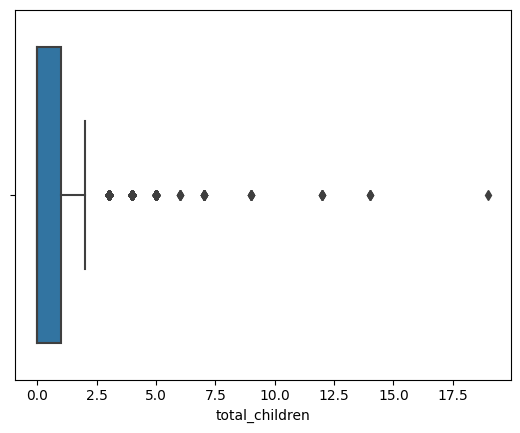

In [368]:
sns.boxplot(x=applications['total_children'])

In [369]:
low, high = numpy.percentile(applications['annual_income'], [25, 75])
iqr = (high - low)
low_fence, high_fence = low - (1.5 * iqr), high + (1.5 * iqr)

outliers = applications.loc[
    (applications["annual_income"] > high_fence) | (applications['annual_income'] < low_fence)
]


print('outliers: ', outliers.shape[0])
print('total samples: ', len(applications))



outliers:  19108
total samples:  438557


Family Size

<Axes: xlabel='family_size'>

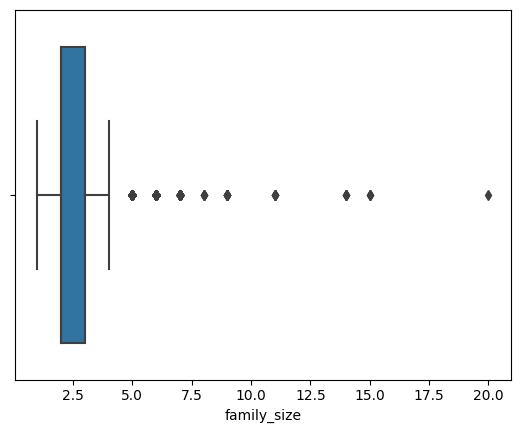

In [370]:
sns.boxplot(x=applications['family_size'])

Feature Engineering

Application Record Features

In [371]:
import math 

applications = applications.drop_duplicates(subset=["client_id"], keep='last', inplace=False)

applications['age'] = applications['birthday'].apply(lambda day: math.floor(abs(day) / 365))

applications['working_years'] = applications['days_employed'].apply(lambda days: math.floor(abs(days) // 365))

applications['employed'] = applications['days_employed'].apply(lambda days: True if days < 0 else False)

applications['emp_stability'] = applications['working_years'].apply(lambda years: True if years > 5 else False)

applications['has_children'] = applications['total_children'].apply(lambda children: True if children > 0 else False)

applications['owns_realty_and_car'] = numpy.where( 
    (applications['has_car'] == 'Y') & (applications['has_realty'] == 'Y'), True, False
)

applications['has_contact_information'] = numpy.where(
    (
        applications['has_email'] == 1
    ) 
    | (
        applications['has_phone_number'] == 1
    )
    | (
        applications['has_work_phone'] == 1
    ), True, False
)

/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_8646/2332671203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applications['age'] = applications['birthday'].apply(lambda day: math.floor(abs(day) / 365))
/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_8646/2332671203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applications['working_years'] = applications['days_employed'].apply(lambda days: math.floor(abs(days) // 365))
/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipyke

Processing Credit Records dataset

In [372]:
# Cleansing credit records dataset 

DUE_DATATYPES = {
    "0": 0,
    "1": -1,
    "2": -2,
    "3": -3,
    "4": -4,
    "5": -5,
    "X": 0,
    "C": 0,
}

credit_records['due_score'] = credit_records['due_status'].map(lambda item: DUE_DATATYPES[item])
credit_records['balance_month'] = credit_records['balance_month'].apply(func=lambda item: abs(item) + 1)
credit_records = credit_records[['client_id', 'balance_month', 'due_score']]

credit_records

,client_id,balance_month,due_score
0,5001711,1,0
1,5001711,2,0
2,5001711,3,0
3,5001711,4,0
4,5001712,1,0
...,...,...,...
1048570,5150487,26,0
1048571,5150487,27,0
1048572,5150487,28,0
1048573,5150487,29,0


Credit Record Features

overdue_score - number of ovedues made by client divided by the total credit window
credit

In [373]:
# introducing credit records features (bad client status)

credit_features = pandas.DataFrame()

credit_windows = credit_records.groupby('client_id')['balance_month'].agg('max').to_frame('credit_window').reset_index()

credit_features['client_id'] = credit_records['client_id'].unique()


credit_features['overdue_score'] = credit_records.groupby(by='client_id')['due_score'].sum().to_numpy()

# number of overdues per client 

overdue_groups = credit_records[
        credit_records['due_score'] < 0
].groupby(by='client_id')['due_score'].count().to_frame("total_overdues").reset_index()


credit_features = credit_features.merge(overdue_groups, on='client_id', how='left')
credit_features['total_overdues'].fillna(0, inplace=True)

overdues = credit_records[credit_records['due_score'] < 0][['client_id', 'balance_month']]

# merging with credit window table
credit_features = credit_features.merge(credit_windows, how='inner', on='client_id')

# annotating bad client status
credit_features = credit_features[['client_id', 'credit_window', 'overdue_score', 'total_overdues']]

credit_features 


,client_id,credit_window,overdue_score,total_overdues
0,5001711,4,0,0.0
1,5001712,19,0,0.0
2,5001713,22,0,0.0
3,5001714,15,0,0.0
4,5001715,60,0,0.0
...,...,...,...,...
45980,5150482,29,0,0.0
45981,5150483,18,0,0.0
45982,5150484,13,0,0.0
45983,5150485,2,0,0.0


Finding average distance between overdues per client

In [374]:
overdues['changes'] = overdues.groupby(by='client_id')['balance_month'].transform(
    func=lambda month: month - month.shift(1)
).fillna(0)

overdues = overdues.groupby(by='client_id')['changes'].agg('mean').to_frame("avg_overdue_change").reset_index()
overdues


,client_id,avg_overdue_change
0,5001718,2.000000
1,5001720,2.142857
2,5001757,0.000000
3,5001786,0.000000
4,5001792,2.000000
...,...,...
5345,5150412,1.000000
5346,5150417,0.000000
5347,5150459,0.800000
5348,5150463,0.666667


In [375]:
features = credit_features.merge(overdues, on='client_id', how='left')

# filling missing values (users, who have brilliant credit history does not have overdues, hence )
features.fillna({
    'balance_month': 0,
    'changes': 0,
    'total_overdues': 0,
}, inplace=True)

features['severe_score'] = abs(features['overdue_score'])

features['overdue_ratio'] = features['total_overdues'] / features['credit_window']

features = features[
    [
    'client_id', 'credit_window', 
    'total_overdues', 'avg_overdue_change', 
    'severe_score', 'overdue_ratio'
    ]
]
    
features

,client_id,credit_window,total_overdues,avg_overdue_change,severe_score,overdue_ratio
0,5001711,4,0.0,NaN,0,0.0
1,5001712,19,0.0,NaN,0,0.0
2,5001713,22,0.0,NaN,0,0.0
3,5001714,15,0.0,NaN,0,0.0
4,5001715,60,0.0,NaN,0,0.0
...,...,...,...,...,...,...
45980,5150482,29,0.0,NaN,0,0.0
45981,5150483,18,0.0,NaN,0,0.0
45982,5150484,13,0.0,NaN,0,0.0
45983,5150485,2,0.0,NaN,0,0.0


In [376]:
sus_clients = features[features['severe_score'] > 0]

Analyzing how severe score increases, based on the credit window

<Axes: xlabel='credit_window', ylabel='severe_score'>

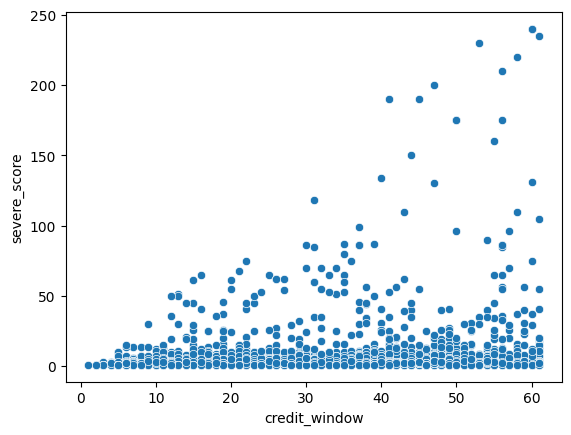

In [377]:
sns.scatterplot(y=sus_clients['severe_score'], x=sus_clients['credit_window'])

Analyzining threshold for average overdue change ratio

<Axes: xlabel='credit_window', ylabel='avg_overdue_change'>

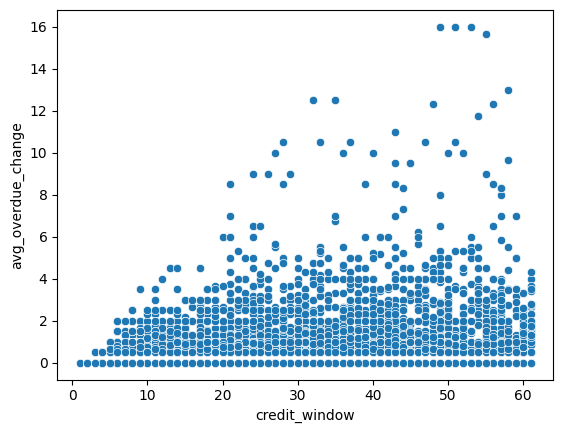

In [378]:
sns.scatterplot(y=sus_clients['avg_overdue_change'], x=sus_clients['credit_window'])

Analyzing Distribution of percentage of overdues, based on the credit window

<Axes: xlabel='credit_window', ylabel='overdue_ratio'>

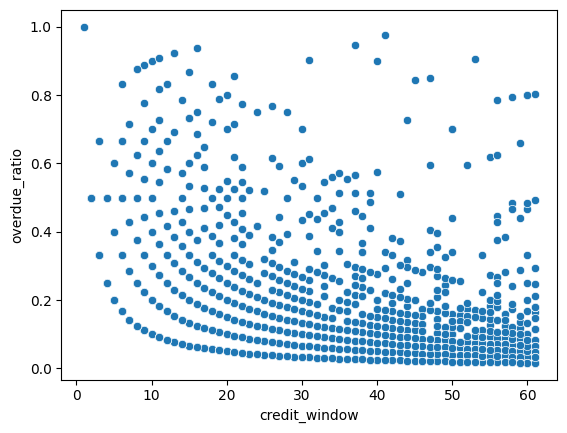

In [379]:
sns.scatterplot(x=sus_clients['credit_window'], y=sus_clients['overdue_ratio'])

Marking clients as bad, based on feature combinations (severe score + period between overdues)

People, who has low time frame between each overdue can be considered as unstable 
because such high frequency might be an indicator of disability to pay. 

Clients, who has some overdues but make them rarely, conversely can be considered as reliable.
Because rare overdues may happen due to touch economy inside the country or some other circumstances, that caused financial dificit.

True - client is bad 
False - client is stable

Crucial Features: 

total overdue score - calculated, based on the severe of overdue (see above)

"Severe Score" - (total overdue score) / number of overdues 

"Period between overdues" - time period between each adjacent overdues


In [380]:
avg_overdue_change_threshold = 0.03
severe_score_threshold = 25
overdue_percentage_ratio_threshold = 0.3
number_of_overdues_threshold = 3

def detect_bad_client(df_row):
    """
    Function detects whether client is good or bad, based on the 
    following criterias:

    1. total_overdues - total number of overdues 
    2. overdue_score - severity of overdues 
    3. overdue_change_ratio - average number of month between each overdue
    
    Thresholds are given above. 

    Args:
        df_row: pandas.DataFrame object, containing criterias
    
    Returns:
        bool:
            True - client is unreliable 
            False - client is responsible
    """
    if df_row['total_overdues'] == 0: return False

    return any([
        (df_row['overdue_ratio'] >= overdue_percentage_ratio_threshold),
        (df_row['avg_overdue_change'] <= avg_overdue_change_threshold and df_row['total_overdues'] > number_of_overdues_threshold),
        (
            df_row['severe_score'] >= severe_score_threshold and
            df_row['total_overdues'] >= number_of_overdues_threshold and
            df_row['avg_overdue_change'] <= avg_overdue_change_threshold
        ),
        (
            df_row['severe_score'] >= severe_score_threshold and
            df_row['total_overdues'] >= number_of_overdues_threshold and
            df_row['overdue_ratio'] >= overdue_percentage_ratio_threshold
        )
    ])

features['bad_client'] = features.apply(func=detect_bad_client, axis=1)

Merging tables together

In [381]:
merged_dataset = applications.merge(features, on='client_id', how='inner')

merged_dataset

,client_id,gender,has_car,has_realty,total_children,annual_income,income_category,education_category,family_status,living_place,...,emp_stability,has_children,owns_realty_and_car,has_contact_information,credit_window,total_overdues,avg_overdue_change,severe_score,overdue_ratio,bad_client
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,True,False,True,True,16,1.0,0.000000,1,0.062500,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,True,False,True,True,15,1.0,0.000000,1,0.066667,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,True,False,30,0.0,NaN,0,0.000000,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,True,False,False,True,5,0.0,NaN,0,0.000000,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,True,False,False,True,27,0.0,NaN,0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,True,False,True,False,12,4.0,1.250000,19,0.333333,True
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,False,False,False,True,24,18.0,0.944444,53,0.750000,True
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,False,False,False,True,33,18.0,0.944444,53,0.545455,True
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,False,False,False,False,10,2.0,0.500000,3,0.200000,False


In [382]:
merged_dataset['bad_client'].value_counts()

bad_client
False    36090
True       367
Name: count, dtype: int64

<Axes: xlabel='annual_income'>

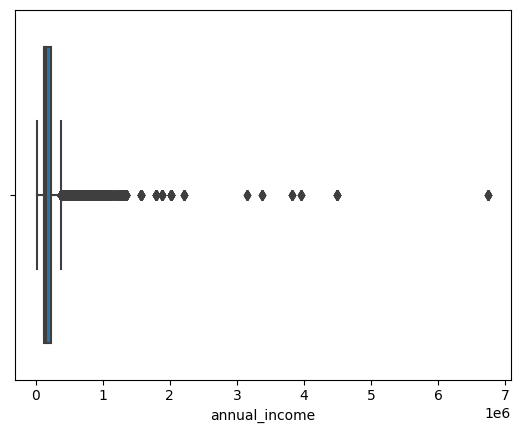

In [383]:
sns.boxplot(x=applications['annual_income'])

In [384]:
def remove_outliers_using_iqr(dataset: pandas.DataFrame, feature_name: str):
    """
    Function removes outliers using IQR Method
    """
    low, high = numpy.percentile(dataset[feature_name], [25, 75])
    iqr = (high - low)
    low_fence, high_fence = low - (1.5 * iqr), high + (1.5 * iqr)

    return dataset.loc[
    (dataset[feature_name] < high_fence) & (dataset[feature_name] > low_fence)
    ]

Dropping outliers

In [385]:
merged_dataset = remove_outliers_using_iqr(merged_dataset, 'annual_income')

In [386]:
merged_dataset = remove_outliers_using_iqr(merged_dataset, 'working_years')

Dataset Splitting (training, testing)

In [387]:
from sklearn.model_selection import train_test_split 

labeled_data = merged_dataset[merged_dataset['bad_client'].notnull()]
unlabeled_data = merged_dataset[merged_dataset['bad_client'].isnull()]

X_labeled = labeled_data.drop(columns=['bad_client'], inplace=False)
Y_labeled = labeled_data['bad_client']


x_train, x_test, y_train, y_test = train_test_split(
    X_labeled, Y_labeled, stratify=Y_labeled, test_size=0.45, random_state=42
)

training_set = pandas.concat([x_train, y_train], axis=1)
testing_set = pandas.concat([x_test, y_test], axis=1)

print(len(training_set), len(testing_set))

15786 12916


Feature Encoding

In [388]:
from sklearn.preprocessing import OrdinalEncoder

def encode_living_place_feature(dataset: pandas.DataFrame):
    """
    Function encodes `living place` dataset using Ordinal Encoding 
    
    Args:
        dataset: pandas.DataFrame object, containing living_place feature
    """
    if not 'living_place' in dataset.columns: return 
    living_categories = [
        'Co-op apartment',
        'Office apartment',
        'Municipal apartment',
        'House / apartment',
        'Rented apartment', 
        'With parents',
    ]
    encoder = OrdinalEncoder(dtype=numpy.int8, categories=[living_categories])
    dataset['living_place'] = encoder.fit_transform(dataset[['living_place']])


def encode_binary_features(feature_dataset: pandas.DataFrame):
    """
    Function encodes binary features (preprocess value labels)
    
    Args:
        feature_dataset (pandas.DataFrame) object, containing values
    """
    binary_features = ['has_realty', 'has_car', 'has_email', 'has_work_phone']
    
    for feature in binary_features:
        feature_dataset[feature].map(
            {
                "Y": True,
                "N": False
            }
        )


def encode_education_category(feature_dataset: pandas.DataFrame):
    """
    Function encodes 'education category' feature using One-Hot Encoding

    Args:
        feature_dataset (pandas.DataFrame) object, containing education category feature 
    """
    if not 'education_category' in feature_dataset: return 
    cats = [
        'Academic degree',
        'Higher education',
        'Incomplete higher',
        'Secondary / secondary special',
        'Lower secondary',
    ]
    encoder = OrdinalEncoder(categories=[cats])
    feature_dataset['education_category'] = encoder.fit_transform(feature_dataset[['education_category']])

def encode_income_category(feature_dataset: pandas.DataFrame):
    """
    Function encodes 'income_category' feature using One-Hot Encoding 

    Args:
        feature_data (pandas.Series) - feature
    
    Returns:
        dataset, containing new encoded feature
    """
    if not 'income_category' in feature_dataset: return 
    cats = [
        "Working",
        "State servant",
        "Pensioner",
        "Commercial associate",
        "Student"
    ]
    encoder = OrdinalEncoder(categories=[cats])
    feature_dataset['income_category'] = encoder.fit_transform(feature_dataset[['income_category']])

def encode_dataset(merged_dataset: pandas.DataFrame):
    """
    Encodes all feature dataset using appropriate
    feature encoding techniques 
    """
    encode_living_place_feature(merged_dataset)
    encode_income_category(merged_dataset)
    encode_binary_features(merged_dataset)
    encode_education_category(merged_dataset)
    return merged_dataset

training_set = encode_dataset(training_set)
testing_set = encode_dataset(testing_set)


Removing Redundant and Unncessesary Features, based on Correlation Matrix output
Features, that has score under 0.4 would be removed

In [389]:

for dataset in [
    training_set, testing_set, unlabeled_data
]:
    dataset.drop(
        columns=[
            'birthday', 
            'days_employed', 
            'total_children',
            'has_realty',
            'has_car',
            'family_status',
            'gender',
            "client_id",
            "job",
            'has_work_phone',
            'has_phone_number',
            'has_mobile_phone',
            'has_email',
            'income_category',
            'total_overdues',
            'avg_overdue_change',
            'severe_score',
            'overdue_ratio'
        ], inplace=True
    )

/var/folders/gy/ny3nd_gs15z0x1xkkb7gfh8w0000gn/T/ipykernel_8646/3346784320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(


Assigning datatypes to the dataset features

In [390]:
def set_datatypes(df):
    # Numeric Data
    df['annual_income'] = df['annual_income'].astype(numpy.int64)
    df['age'] = df['age'].astype(numpy.int8)
    df['working_years'] = df['working_years'].astype(numpy.int8)

    # Categorical Data
    df['living_place'] = df['living_place'].astype(numpy.int8)

set_datatypes(training_set)
set_datatypes(testing_set)

In [391]:
training_set.isna().sum()

annual_income              0
education_category         0
living_place               0
family_size                0
age                        0
working_years              0
employed                   0
emp_stability              0
has_children               0
owns_realty_and_car        0
has_contact_information    0
credit_window              0
bad_client                 0
dtype: int64

Balancing training set using SMOTE (Sensitive Minority Oversampling Technique).

In [392]:
from imblearn.over_sampling import SMOTE 

x_data, y_data = training_set.drop(columns=['bad_client']), training_set['bad_client']

def balance_dataset(X_data: pandas.DataFrame, Y_data: pandas.Series):
    """
    Function uses SMOTE (Sensitivity Class Over Sampling Technique) to address class imbalance issue
    
    Args:
        X_data: pandas.DataFrame object containing independent features
        Y_data: pandas.Series object representing target variable
    """
    encoder = SMOTE(k_neighbors=5, random_state=42)
    x_res, y_res = encoder.fit_resample(X=X_data, y=Y_data)
    return pandas.concat([x_res, y_res], axis=1)


# training_set = balance_dataset(X_data=x_data, Y_data=y_data)

Checking balance

<Axes: xlabel='bad_client', ylabel='count'>

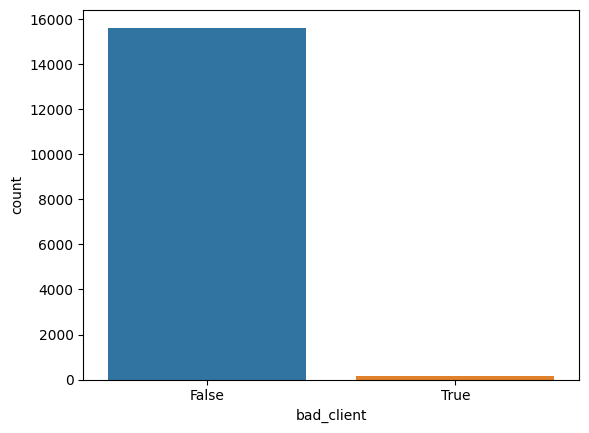

In [393]:
sns.countplot(data=training_set, x='bad_client')

Checking correlation between features on training set using Correlation Matrix

<Axes: >

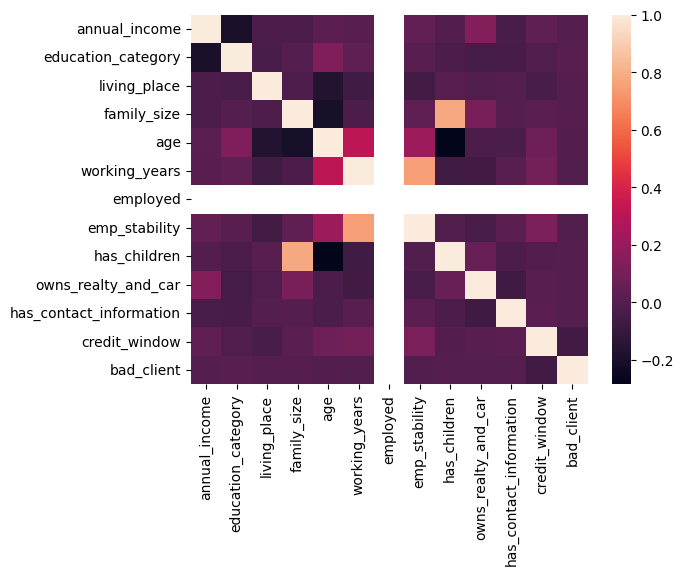

In [394]:
sns.heatmap(training_set.corr())

Checking feature correlation on testing set using Correlation Matrix

<Axes: >

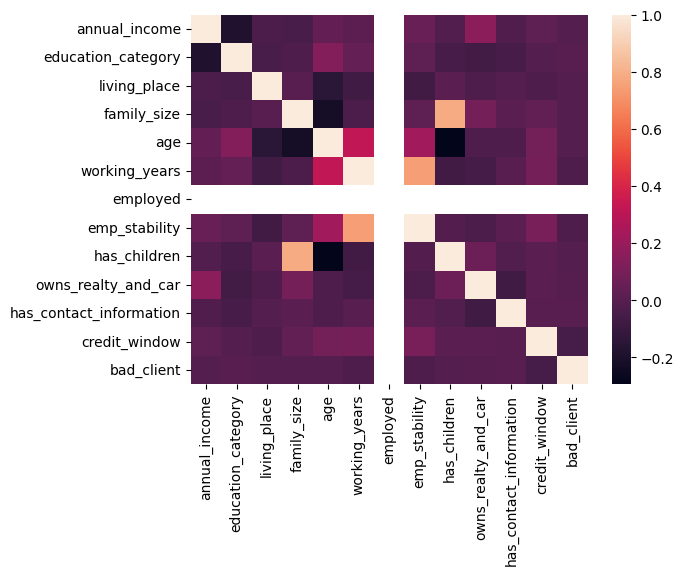

In [395]:
sns.heatmap(testing_set.corr())

Saving new datasets to a CSV Files

In [396]:
training_set.to_csv("../processed_data/training_set.csv")
testing_set.to_csv('../processed_data/testing_set.csv')